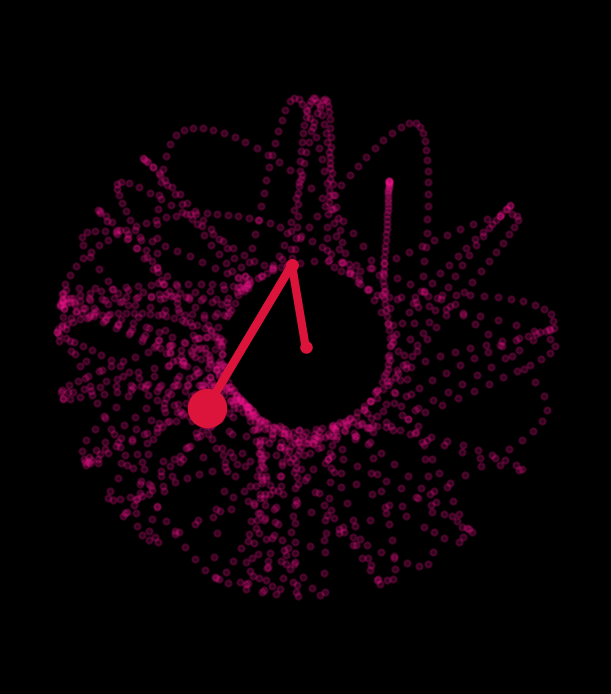

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros del péndulo doble
m1 = 1.0
m2 = 2.0
L1 = 1.0
L2 = 2.0
g = 9.8

# Condiciones iniciales
theta1 = np.pi/2
theta2 = np.pi
omega1 = 0
omega2 = 0
y0 = np.array([theta1, omega1, theta2, omega2])

# Tiempo de la simulación y paso de tiempo
t = np.linspace(0, 30, 1500)
dt = t[1] - t[0]

# Función para la derivada del sistema
def dy_dt(y, t, m1, m2, L1, L2, g):
    theta1, omega1, theta2, omega2 = y
    dtheta1_dt = omega1
    domega1_dt = (m2*g*np.sin(theta2)*np.cos(theta1-theta2) - m2*np.sin(theta1-theta2)*\
                  (L1*omega1**2*np.cos(theta1-theta2) + L2*omega2**2) - (m1+m2)*g*np.sin(theta1)) / \
                 (L1*(m1+m2*np.sin(theta1-theta2)**2))
    dtheta2_dt = omega2
    domega2_dt = ((m1+m2)*(L1*omega1**2*np.sin(theta1-theta2) - g*np.sin(theta2) + g*np.sin(theta1)*np.cos(theta1-theta2)) + \
                 m2*L2*omega2**2*np.sin(theta1-theta2)*np.cos(theta1-theta2)) / \
                 (L2*(m1+m2*np.sin(theta1-theta2)**2))
    return np.array([dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt])

# Solución del sistema de ecuaciones diferenciales
y = np.zeros((len(t), 4))
y[0] = y0
for i in range(len(t)-1):
    y[i+1] = y[i] + dy_dt(y[i], t[i], m1, m2, L1, L2, g)*dt

# Posiciones de los extremos de los péndulos
x1 = L1 * np.sin(y[:, 0])
y1 = -L1 * np.cos(y[:, 0])
x2 = x1 + L2 * np.sin(y[:, 2])
y2 = y1 - L2 * np.cos(y[:, 2])

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5, 7), dpi=150)
ax.set_axis_off()
plt.style.use('dark_background')

# Configurar los ejes
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.grid()

# Crear las líneas que representan los péndulos
line1, = ax.plot([], [], lw=4, color='crimson', marker='o', markersize=5)
line2, = ax.plot([], [], lw=4, color='crimson', marker='o', markersize=5)
points, = ax.plot([], [], 'o', markersize=3, color='deeppink', alpha=0.2, zorder=1)
point2, = ax.plot([], [], 'o', markersize=18, color='crimson')

# Función para la actualización de las posiciones
#def update_position(i, line1, line2, points):
    # Actualización de las líneas
    #line1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    #line2.set_data([x1[i], x2[i]], [y1[i], y2[i]])

    # Actualización de los puntos
    #if i % 10 == 0:
       # points.set_data(x2[:i], y2[:i])

    #return line1, line2, points

def update_position(i, line1, line2, point2,points):
    # Actualización de las líneas
    line1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    line2.set_data([x1[i], x2[i]], [y1[i], y2[i]])

    # Actualización de la posición de la bola en el extremo inferior del segundo péndulo
    point2.set_data([x2[i]], [y2[i]])

    # Actualización de los puntos
    if i % 10 == 0:
        points.set_data(x2[:i], y2[:i])

    return line1, line2, point2, points

# Creación de la animación
animation = FuncAnimation(fig, update_position, fargs=(line1, line2,point2, points), frames=len(t), interval=60, blit=True)

# Guardar la animación como gif
animation.save('pendulo_doble4.gif', writer='pillow')